In [35]:
import pandas as pd 
import glob 
import matplotlib.pyplot as plt 
import re 
import numpy as np 

In [36]:
filenames = glob.glob('Series_a_ajustar/*.csv')

### Estadística sobre las series completas

Defino el largo del meme como el intervalo de tiempo que contiene el 90% de los datos, y el volumen con la cantidad de datos en este intervalo (medios + blogs).

In [41]:
# Levanto el archivo en caso de ya haber sido creado
data_statistics = pd.read_csv('Estadistica_series_leskovec.csv')

In [42]:
data_statistics.Analyzed.value_counts()

False    71365
True       203
Name: Analyzed, dtype: int64

### Identificación de las series analizadas

En qué parte de los espacios de volumen y duración caen.

El criterio tomado fue ver las series de mayor a menor promedio entre el volumen de los blogs y el de los medios:

In [43]:
data_statistics['vol_summary'] = 0.5*(data_statistics['vol_media'] + data_statistics['vol_blog'])

In [44]:
data_statistics.sort_values(by = 'vol_summary', ascending = False)

,filename,vol_media,vol_blog,dat90,duration,fileid,Analyzed,vol_summary
69744,Series_a_ajustar/Corte_id1324836.csv,7115.975053,9117.903962,14610.491114,437.0,1324836,False,8116.939508
1574,Series_a_ajustar/Corte_id1616375.csv,12151.835150,539.253718,11421.979981,123.0,1616375,False,6345.544434
7969,Series_a_ajustar/Corte_id884171.csv,6338.997704,5246.322710,10426.788373,268.0,884171,True,5792.660207
19581,Series_a_ajustar/Corte_id1414705.csv,5219.374336,5996.067960,10093.898066,473.0,1414705,False,5607.721148
43549,Series_a_ajustar/Corte_id2595895.csv,4682.137885,3167.550438,7064.719491,145.0,2595895,True,3924.844162
...,...,...,...,...,...,...,...,...
30149,Series_a_ajustar/Corte_id2486137.csv,0.672747,0.000000,0.605473,10.0,2486137,False,0.336374
31672,Series_a_ajustar/Corte_id1837114.csv,0.000000,0.672747,0.605473,10.0,1837114,False,0.336374
47163,Series_a_ajustar/Corte_id1849425.csv,0.000000,0.672747,0.605473,10.0,1849425,False,0.336374
30349,Series_a_ajustar/Corte_id347074.csv,0.000000,0.672747,0.605473,10.0,347074,False,0.336374


### Figuras

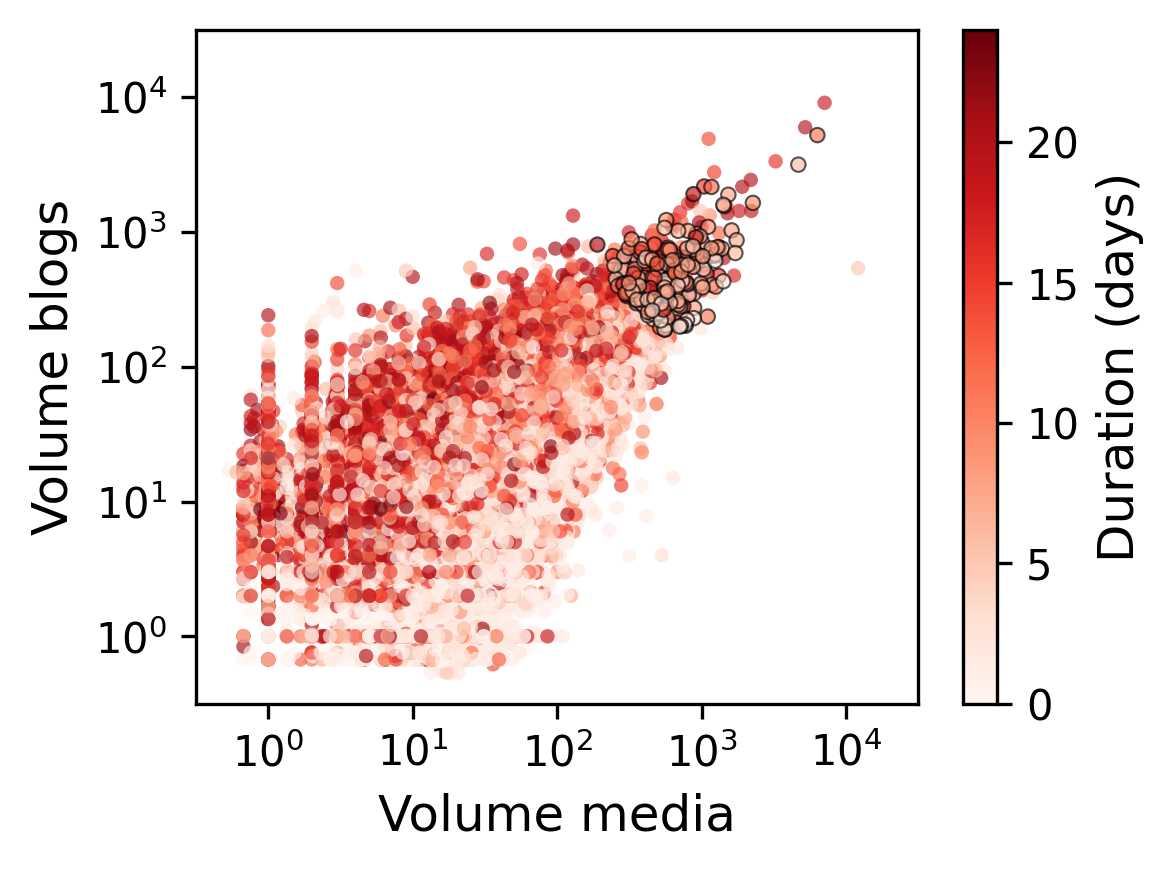

In [71]:
plt.figure(dpi = 300, figsize = (4,3))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.65}

# Duration saturated
duration_non_analyzed = data_statistics[data_statistics['Analyzed'] == False]['duration'].to_numpy() / 24
duration_non_analyzed = [int(np.round(d)) if d < 24 else 24 for d in duration_non_analyzed]

duration_analyzed = data_statistics[data_statistics['Analyzed'] == True]['duration'].to_numpy() / 24
duration_analyzed = [int(np.round(d)) if d < 24 else 24 for d in duration_analyzed]

plt.scatter(data_statistics[data_statistics['Analyzed'] == False]['vol_media'], data_statistics[data_statistics['Analyzed'] == False]['vol_blog'], 
            linewidth = 0,
            alpha = data_statistics[data_statistics['Analyzed'] == False]['Analyzed'].apply(lambda x: alpha_dict[x]).to_list(),
            c = duration_non_analyzed, cmap = 'Reds', vmin=0, vmax = 24, s = 12)


plt.scatter(data_statistics[data_statistics['Analyzed'] == True]['vol_media'], data_statistics[data_statistics['Analyzed'] == True]['vol_blog'], 
            edgecolors = 'black', linewidth = 0.5,
            alpha = data_statistics[data_statistics['Analyzed'] == True]['Analyzed'].apply(lambda x: alpha_dict[x]).to_list(),
            c = duration_analyzed, cmap = 'Reds', vmin=0, vmax = 24, s = 12)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Volume media', size = 12)
plt.ylabel('Volume blogs', size = 12)

plt.xlim([10**-0.5, 10**4.5])
plt.ylim([10**-0.5, 10**4.5])

plt.xticks([10**i for i in range(5)])
plt.yticks([10**i for i in range(5)])

plt.minorticks_off()

cbar = plt.colorbar()
cbar.set_label('Duration (days)', size = 12)

plt.tight_layout()

plt.savefig('Leskovec_summary.png')
plt.savefig('Leskovec_summary.pdf')

plt.show()

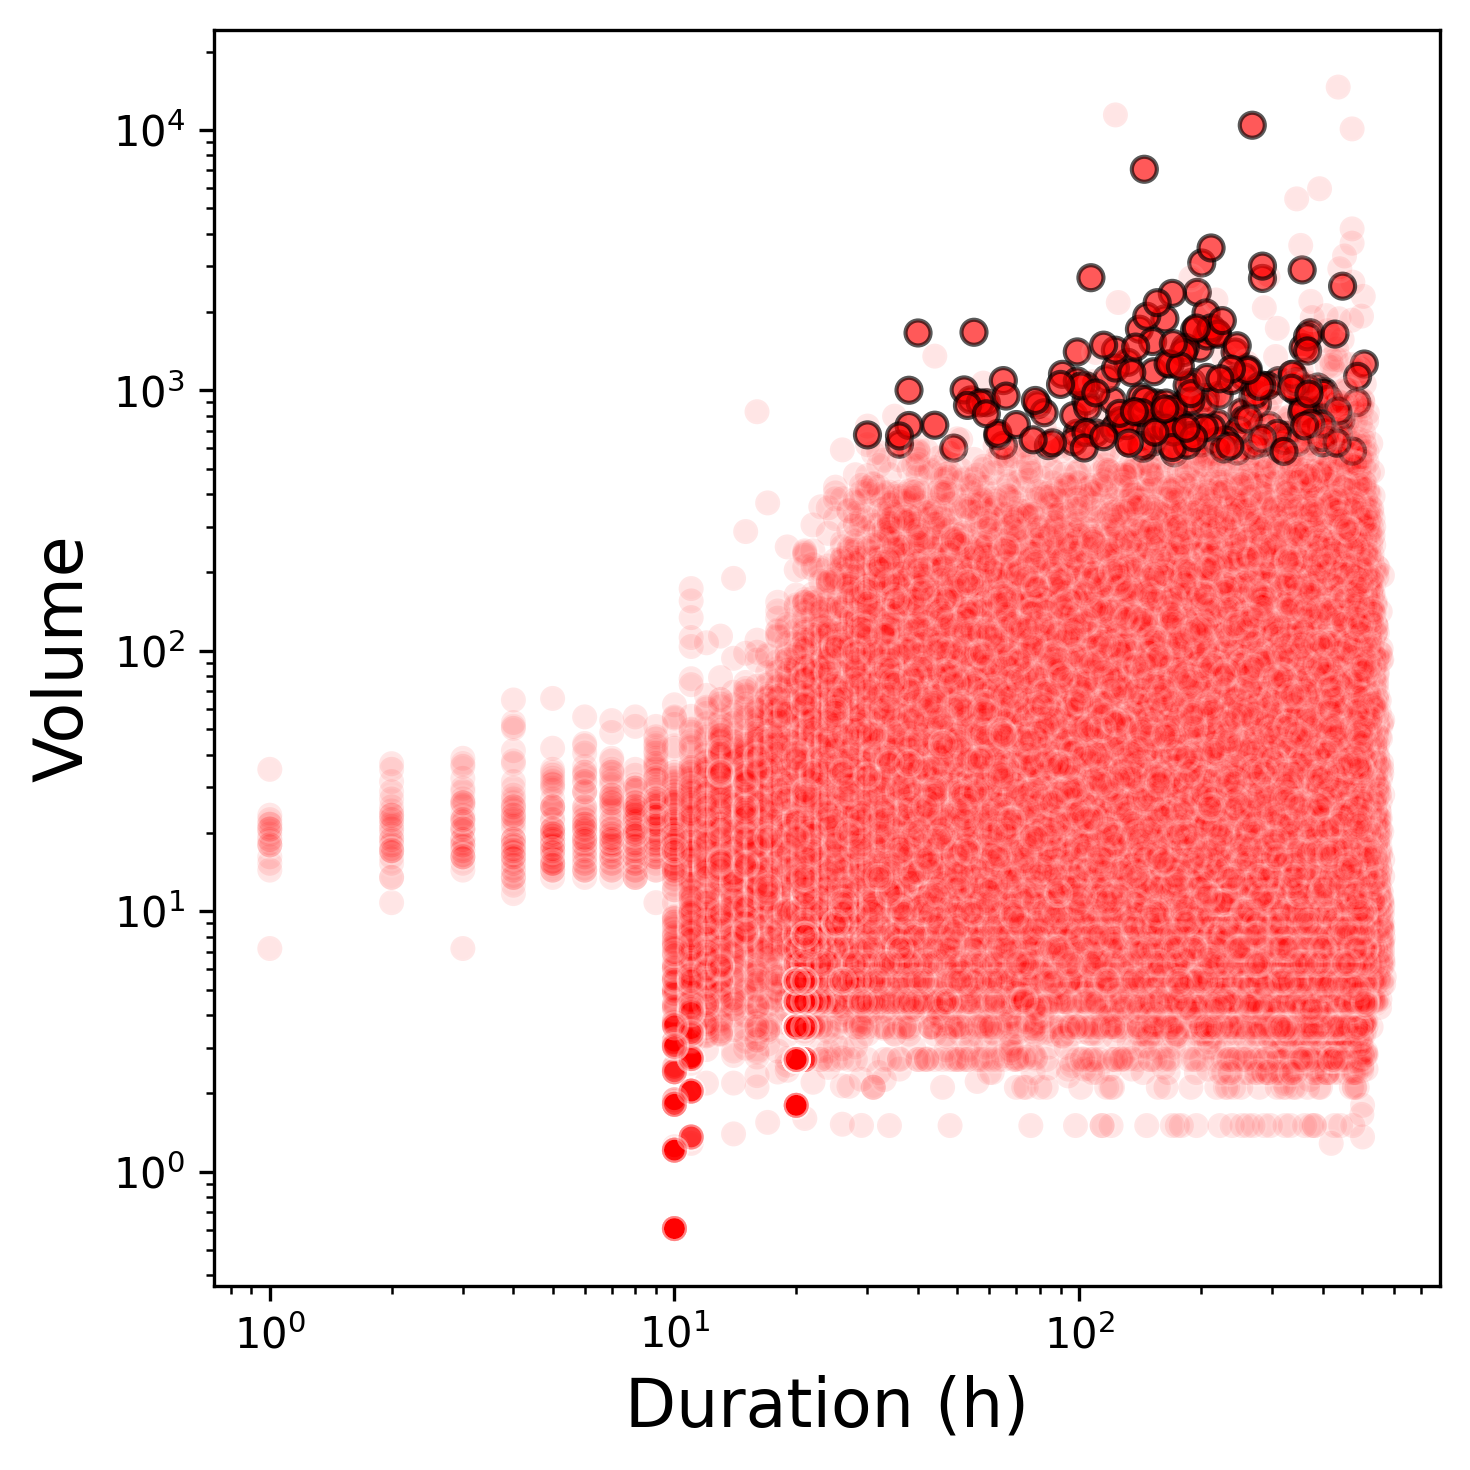

In [70]:
plt.figure(dpi = 300, figsize = (5,5))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.10}
edgecolor_dict = {True: 'k', False: 'white'}

plt.scatter(data_statistics['duration'], data_statistics['dat90'], 
            edgecolors = data_statistics['Analyzed'].apply(lambda x: edgecolor_dict[x]).to_list(),
            alpha = data_statistics['Analyzed'].apply(lambda x: alpha_dict[x]).to_list(),
            c = 'r')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Duration (h)', size = 16)
plt.ylabel('Volume', size = 16)
plt.tight_layout()

#plt.savefig('Leskovec_summary.png')
#plt.savefig('Leskovec_summary.pdf')

plt.show()

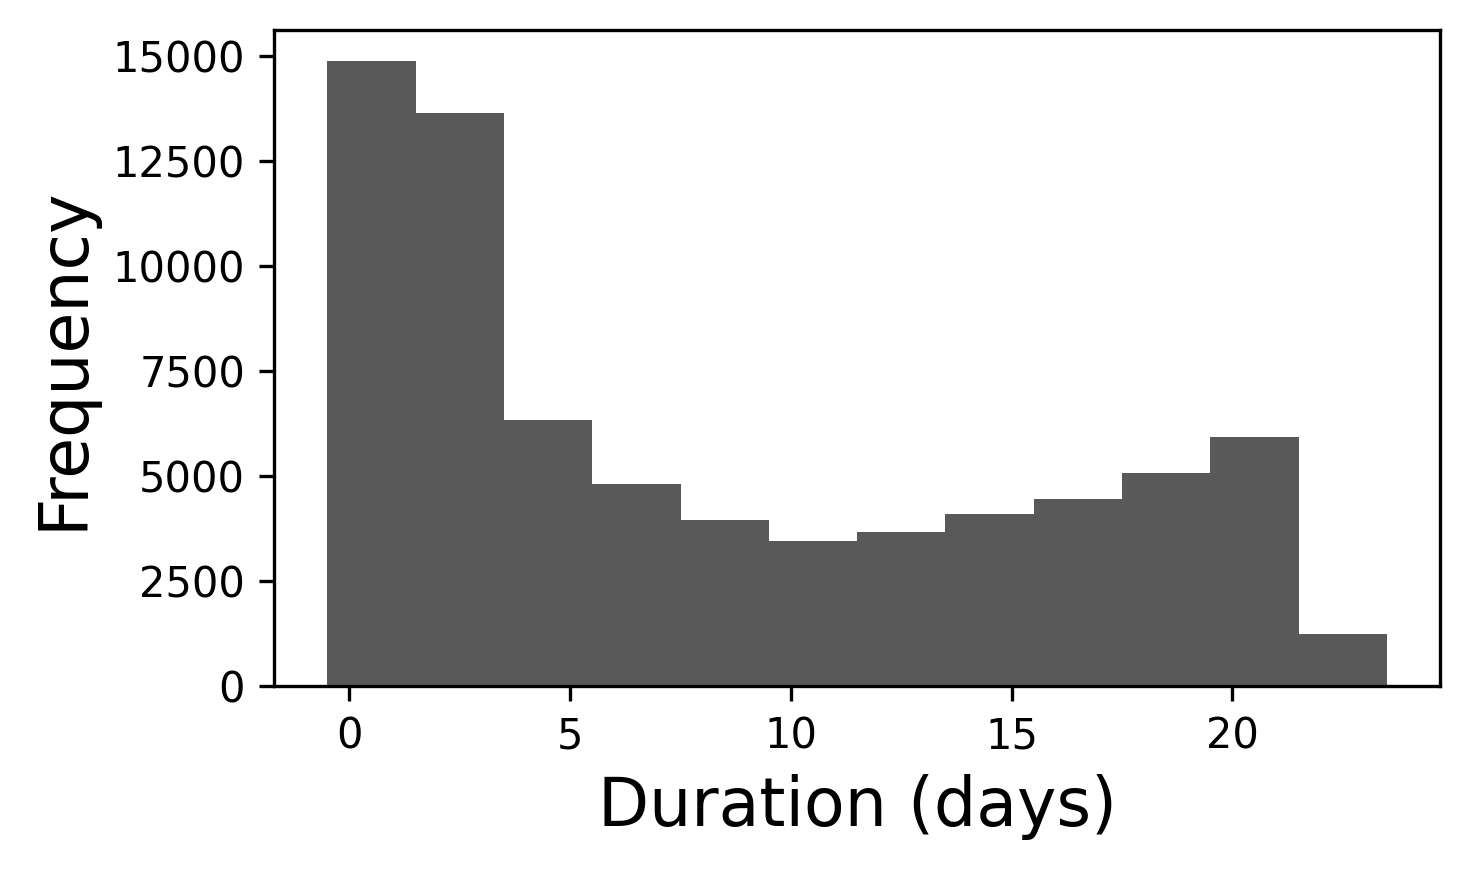

In [72]:
plt.figure(dpi = 300, figsize = (5,3))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.10}
edgecolor_dict = {True: 'k', False: 'white'}

plt.hist(data_statistics['duration'] / 24, bins = np.arange(-0.5, 25.5, 2), color = 'k', alpha = 0.65)
#plt.xscale('log')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Duration (days)', size = 16)
plt.ylabel('Frequency', size = 16)
plt.tight_layout()
plt.savefig('Histogram_duration.pdf')
plt.show()

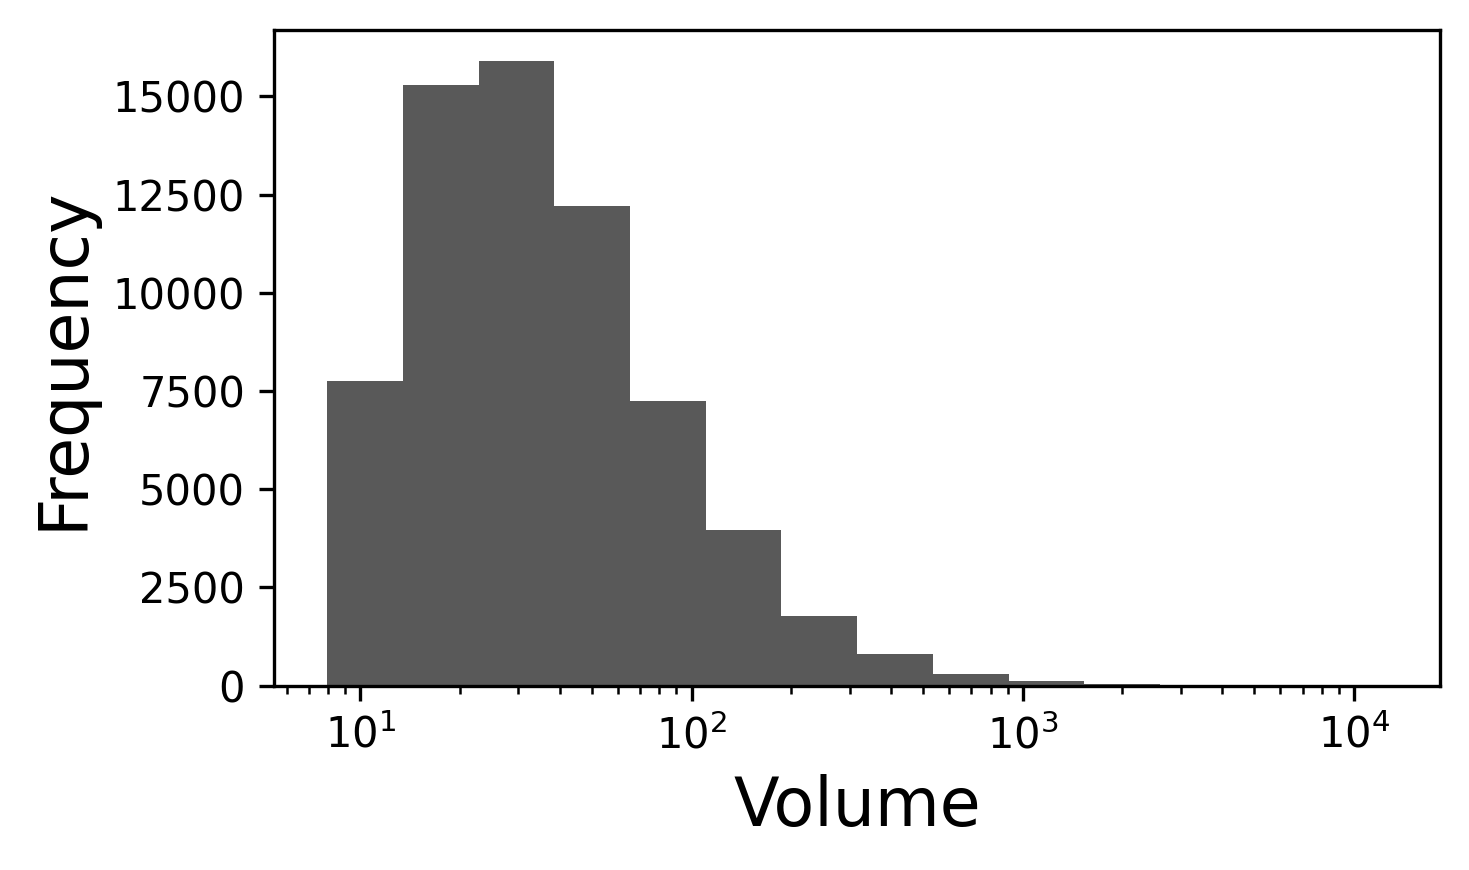

In [48]:
plt.figure(dpi = 300, figsize = (5,3))

color_dict = {True: 'r', False: 'k'}
alpha_dict = {True: 0.65, False: 0.10}
edgecolor_dict = {True: 'k', False: 'white'}

plt.hist(data_statistics['dat90'], bins = np.logspace(0.9, 4.1, 15), color = 'k', alpha = 0.65)
plt.xscale('log')
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.xlabel('Volume', size = 16)
plt.ylabel('Frequency', size = 16)
plt.tight_layout()
plt.show()